In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import re
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid.inset_locator import inset_axes

<ipython-input-2-dfe8acc9d3f0>:6: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


In [8]:
files = ['dar323_control_npt_prod_rmsf.xvg',
        'dar323_Y103F_npt_prod_rmsf.xvg']

In [9]:
colors = cm.get_cmap('magma', 12)

In [10]:
#Raw data
mutations = ('S40D', 'S54A', 'A55D', 'D69Q', 'V71F', 'S54A', 'A55W', 'Y103F', 'S54A', 'S54A')
scores = np.concatenate((np.array([-1.27, 0.57, -0.83, -0.21, -0.36]), np.array([0.38, 0.52]), np.array([-0.71]), np.array([0.45]), np.array([0.47])))
antibodies = ["Pertuzumab"] * 5 + ["Atezolizumab"] * 2 + ["Daratumuab"] * 1 + ["Omalizumab"] * 1 + ["Trastzumab"] * 1

d = {'Antibody': antibodies, 'Mutation': mutations, 'Score': scores}
df = pd.DataFrame(data=d)

<ipython-input-25-97c2d2fcf574>:106: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


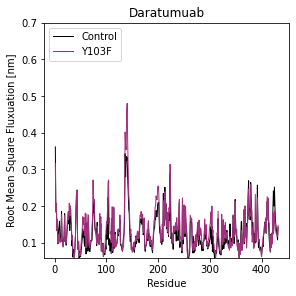

In [25]:
xVals = []
numFiles = len(files)
fig, ax = plt.subplots(1, int(numFiles/2), constrained_layout=True, squeeze=True)
fig.set_figheight(4)
fig.set_figwidth(int(numFiles/2)*4)
fileNum = 0

for c in files: 
    count = 0
    fileNum += 1
    section = c[0:-4]
    name = 'results/' + section + '_now.xvg'
    with open(name, 'r') as file:
        title = ""
        xyaxis_labels = list()
        data_x = list()
        data_y = list()

        for line in file:
            if line.find("@") != -1:

                # Extracts the title
                if re.match("title", line.split()[1]):
                    title = line.split()[2].strip('\"')

                # Extracts the legends for the axes
                if len(line.split()) > 3:
                    if re.match("label", line.split()[2]):
                        xyaxis_labels.append(line.split('"')[1])

            if not line.startswith("@") and not line.startswith("#"):
                                  count += 1
                                  data_x.append(count)
                                  data_y.append(float(line.split()[1]))

    mutation = ''
    val=c.index('_')
    antibody = c[:val]
    newC = c[val+1:]
    val2=newC.index('_')
    newC2 = newC[val2+1:]
    if newC2[0:8] != 'npt_prod':
        val3 = newC2.index('_')
        mutation = c[val+1:val+val2+val3+1+1]
    else:
        mutation = c[val+1:val+val2+1]

    if antibody == "ate323":
        antibody = "Atezolizumab"
        cVal = colors[0]
        xC = 0
        yC = 0
    elif antibody == "oma366":
        antibody = "Omalizumab"
        cVal = colors(3/6)
        xC = 0
        yC = 1
    elif antibody == "per323":
        antibody = "Pertuzumab"
        cVal = colors(4/6)
        xC = 0
        yC = 2
    elif antibody == "tra366":
        antibody = "Trastzumab"
        cVal = colors(5/6)
        xC = 0
        yC = 3
    elif antibody == "dar323":
        antibody = "Daratumuab"
        cVal = colors(5/12)
        xC = 0
        yC = 0
        numFiles = 0

    if "_" in mutation:
        unscInd = mutation.index('_')
        mutationFinal = mutation[:unscInd] + " & " + mutation[unscInd+1:]
    elif mutation == "control":
        mutationFinal = "Control"
    else: 
        mutationFinal = mutation

    name = antibody + ": " + mutationFinal

    #ax[yC].plot(data_x, data_y)
    if mutation == "control":
        ax.plot(data_x[:-3], data_y[:-3], color = 'k', linewidth = 1, alpha = 1 ,label = mutationFinal)
        #ax.scatter(data_x[:-3], data_y[:-3], color = 'k', s = 0.2, alpha = 1 ,label = mutationFinal)
    else: 
        ax.plot(data_x[:-3], data_y[:-3], color = cVal, linewidth = 1, alpha = 1, label = mutationFinal, linestyle = '-')
        #ax.scatter(data_x[:-3], data_y[:-3], color = cVal, s = 0.2, alpha = 1 ,label = mutationFinal)
    ax.set_ylim([min(data_y),0.7])
    ax.set_xlabel("Residue")
    ax.set_ylabel("Root Mean Square Fluxuation [nm]")
    ax.legend(loc="upper left")
    #ax[yC].set_xticks(np.arange(0,int(max(data_x))+20000,20000))
    #ax[yC].set_xticklabels(np.arange(0,int(max(data_x)/1000)+20,20), rotation=60)

    ax.set_title(antibody)
    for x in range(len(df['Antibody'])):
        if df.loc[x]['Antibody'] == antibody and df.loc[x]['Mutation'] == mutationFinal: 
            ddg = '$\Delta$$\Delta$G = ' + str(df.loc[x]['Score'])
            #ax[yC].text(0, 0, ddg, fontsize=15)
    
    xVals.append(data_y)
fig.show()
saveName = 'pictures/all' + "_.jpg"
plt.savefig(saveName)


In [34]:
delta = []
for i in range(len(xVals[0])):
    delta.append(-(xVals[0][i]-xVals[1][i]))

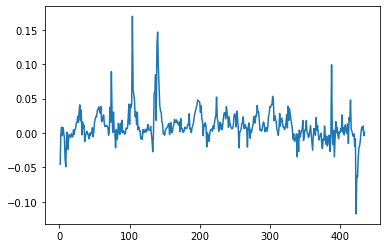

In [35]:
plt.plot(data_x, delta)